This example shows the basic functionality to read data download from the Internatinal Soil Moisture Network (ISMN).
The data is accessible at `www.ismn.geo.tuwien.ac.at` after registration.

The class for reading is called `ISMN_Interface`. It provides functions to access single networks, stations and sensors and the measured time series for each sensor. The `ISMN_Interface` class takes either the root directory where the extracted ISMN files are, or a zip archive of the data directly (reading from zip is significantly slower).

In [1]:
from ismn.interface import ISMN_Interface

import matplotlib.pyplot as plt
%matplotlib inline

# Enter the path to your ISMN data
path_to_ismn_data = "/home/wolfgang/data-read/ismn/Data_separate_files_20090804_20201212/"

ismn_data = ISMN_Interface(path_to_ismn_data)

The following command will initialise the reader. The first time this is done, metadata for each sensor will we collected. This will iterate through all files and detect e.g. station names, time coverage, measurement depths etc. Metadata collection can take a few minutes and will start multiple parallel processes. By default the `python_metadata` folder will be placed in the passed root directory. The next time the reader is created it will use `python_metadata` instead of generating it again.

You can define a different path, where the metadata is stored, resp. looked for by passing a `meta_path` when initialsing `ISMN_Interface`. You can also define a list of network names that are considered when reading the data (this will not affect metadata generation). Passing `keep_loaded_data=True` means that all time series, once read, will be kept in memory for faster subsequent access. This can fill up your memory and is only recommended for small data samples.

In this example we use the default metadata path.

## Accessing data components.

`ISMN_Interface` contains a `collection` of active ISMN networks. The collection lists the network name and names of all stations in a network. A network can be selected via its name.

In [20]:
ismn_data.collection.networks.keys()

odict_keys(['BIEBRZA-S-1', 'CAMPANIA', 'FMI', 'GROW', 'GTK', 'HYDROL-NET-PERUGIA', 'IMA-CAN1', 'METEROBS', 'REMEDHUS', 'RSMN', 'SCAN', 'SMOSMANIA', 'SWEX-POLAND', 'UDC-SMOS', 'UMSUOL', 'VAS', 'WEGENERNET'])

A network can be selected:

A single network from the collection can be accessed via its name.

In [56]:
network = ismn_data.collection.networks['REMEDHUS']
network

Stations in 'REMEDHUS': ['Canizal', 'Carramedina', 'Carretoro', 'CasaPeriles', 'ConcejodelMonte', 'ElCoto', 'ElTomillar', 'Granja-g', 'Guarena', 'Guarrati', 'LaAtalaya', 'LaCruzdeElias', 'LasArenas', 'LasBodegas', 'LasBrozas', 'LasEritas', 'LasTresRayas', 'LasVacas', 'LasVictorias', 'LlanosdelaBoveda', 'Paredinas', 'Zamarron']

A network consists of multiple stations, multiple variables can be measured by different sensors at a station:

In [57]:
station = network.stations['CasaPeriles']
station

Sensors at 'CasaPeriles': ['Stevens-Hydra-Probe_soil_temperature_0.000000_0.050000', 'Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000']

Accessing sensors at a station works similar to accessing stations in a network. By default the name is created from the instrument type, the measurued variable and the depth layer that the senosor measures in.

In [58]:
sensor = station['Stevens-Hydra-Probe_soil_temperature_0.000000_0.050000']
sensor

Stevens-Hydra-Probe_soil_temperature_0.000000_0.050000

A data file is assigned to each sensor, that contains the sensor variable time series and quality flags. 

In [59]:
sensor.read_data()

,soil_temperature,soil_temperature_flag,soil_temperature_orig_flag
date_time,,,
2009-08-04 00:00:00,25.8,G,M
2009-08-04 01:00:00,25.5,G,M
2009-08-04 02:00:00,25.1,G,M
2009-08-04 03:00:00,24.8,G,M
2009-08-04 04:00:00,24.5,G,M
...,...,...,...
2019-12-31 20:00:00,5.3,G,M
2019-12-31 21:00:00,5.0,G,M
2019-12-31 22:00:00,4.8,G,M


Additionally, metadata is assigned to each sensor. Some metadata is sensor specific (e.g. soil properties, time series range), some depends on the location of the station and is therefore shared by multiple sensors (landcover and climate classes etc.).
The first value in each Variable is the name of the metadata variable, the second the actual value for the variable. The third value (tuple) is the depth that the value applies to (for soil properties multiple layers are provided together with the ISMN data, during metadata generation the best matching depth for a sensor is selected).

In [60]:
sensor.metadata

MetaData([
  MetaVar([clay_fraction, 21.0, Depth([0.0, 0.3])]),
  MetaVar([climate_KG, BSk, None]),
  MetaVar([climate_insitu, unknown, None]),
  MetaVar([elevation, -99.9, None]),
  MetaVar([instrument, Stevens-Hydra-Probe, Depth([0.0, 0.05])]),
  MetaVar([latitude, 41.39392, None]),
  MetaVar([lc_2000, 10.0, None]),
  MetaVar([lc_2005, 10.0, None]),
  MetaVar([lc_2010, 10.0, None]),
  MetaVar([lc_insitu, unknown, None]),
  MetaVar([longitude, -5.32146, None]),
  MetaVar([network, REMEDHUS, None]),
  MetaVar([organic_carbon, 0.65, Depth([0.0, 0.3])]),
  MetaVar([sand_fraction, 36.0, Depth([0.0, 0.3])]),
  MetaVar([saturation, 0.43, Depth([0.0, 0.3])]),
  MetaVar([silt_fraction, 43.0, Depth([0.0, 0.3])]),
  MetaVar([station, CasaPeriles, None]),
  MetaVar([timerange_from, 2009-08-04 00:00:00, None]),
  MetaVar([timerange_to, 2020-01-01 00:00:00, None]),
  MetaVar([variable, soil_temperature, Depth([0.0, 0.05])])
])

Station locations for a specific variable can be visualised on a map. If a min/max depth is passed, only stations with a sensor that measures within the passed range are included.

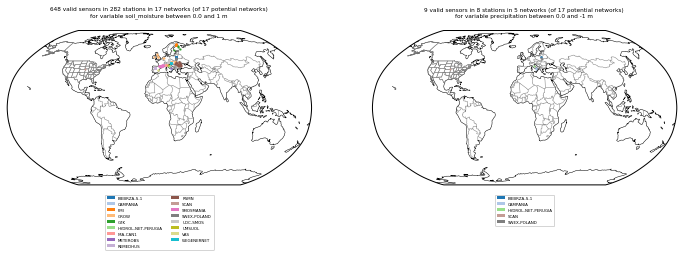

In [61]:
import cartopy.crs as ccrs

#plot available station on a map
fig, axs = plt.subplots(1, 2, figsize=(12,6), subplot_kw={'projection': ccrs.Robinson()})
ismn_data.plot_station_locations('soil_moisture', min_depth=0., max_depth=1, ax=axs[0])
ismn_data.plot_station_locations('precipitation', min_depth=0., max_depth=-1, ax=axs[1])

plt.show()

In [ ]:
## Selecting and interating over data

In [ ]:
#to make sure the selected variable is not measured
#by different sensors at the same depths
#we also select the first depth and the first sensor
#even if there is only one
depths_from,depths_to = station_obj.get_depths(variables[0])

sensors = station_obj.get_sensors(variables[0],depths_from[0],depths_to[0])

#read the data of the variable, depth, sensor combination
time_series = station_obj.read_variable(variables[0],depth_from=depths_from[0],depth_to=depths_to[0],sensor=sensors[0])

#print information about the selected time series
print "Selected time series is:"
print time_series

In [ ]:
#plot the data
time_series.plot()
plt.legend()
plt.show()


In [ ]:
#we also want to see soil moisture
sm_depht_from,sm_depht_to = station_obj.get_depths('soil moisture')
print sm_depht_from,sm_depht_to


In [ ]:
#read sm data measured in first layer 0.2-0.2m
sm = station_obj.read_variable('soil moisture',depth_from=0.2,depth_to=0.2)
sm.plot()
plt.show()


In [ ]:
# the data attribute is a pandas.DataFrame
time_series.data